data visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/train.csv")
df.head(10)

id              type  fiberID   psfMag_u   psfMag_g   psfMag_r   psfMag_i  \
0   0               QSO      601  23.198224  21.431953  21.314148  21.176553   
1   1               QSO      788  21.431355  20.708104  20.678850  20.703420   
2   2               QSO      427  17.851451  16.727898  16.679677  16.694640   
3   3               QSO      864  20.789900  20.040371  19.926909  19.843840   
4   4    STAR_RED_DWARF      612  26.454969  23.058767  21.471406  19.504961   
5   5  SERENDIPITY_BLUE       76  19.781358  19.315942  19.431752  19.600843   
6   6               QSO      696  22.227121  21.120919  20.715289  20.575474   
7   7          STAR_BHB       14  17.024278  15.786268  15.524910  15.500176   
8   8               QSO      384  20.793464  20.773064  20.607211  20.362645   
9   9     STAR_CATY_VAR       38  20.628414  18.315460  16.993596  15.979193   

    psfMag_z  fiberMag_u  fiberMag_g  ...  petroMag_u  petroMag_g  petroMag_r  \
0  21.171444   22.581309   21.644453  ...   22.504317   21.431636   21.478312   
1  20.473229   21.868797   21.029773  ...   21.360701   20.778968   20.889705   
2  16.641788   18.171890   17.033098  ...   17.867253   16.738784   16.688874   
3  19.463270   21.039030   20.317165  ...   20.433907   19.993727   19.985531   
4  18.389096   25.700632   23.629122  ...   25.859229   22.426929   21.673551   
5  19.674611   20.167919   19.661686  ...   19.982358   19.390363   19.552879   
6  20.214773   22.765383   21.275343  ...   21.954245   21.039226   20.721977   
7  15.527453   17.336320   16.063400  ...   17.093958   15.804802   15.625482   
8  20.256067   21.183702   21.089308  ...   21.121991   20.756746   20.721068   
9  15.436727   20.970155   18.656975  ...   20.475790   18.369660   17.012885   

   petroMag_i  petroMag_z  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0   21.145409   20.422446   22.749241   21.465534   21.364187   21.020605   
1   20.639812   20.646660   21.492955   20.758527   20.753925   20.693389   
2   16.744210   16.808006   17.818063   16.697434   16.641249   16.660177   
3   19.750917   19.455117   20.770711   20.001699   19.889798   19.758113   
4   19.610012   18.376141   24.877052   23.147993   21.475342   19.487330   
5   19.688197   19.799425   19.899462   19.325313   19.469356   19.598653   
6   20.576279   19.699959   22.081704   21.063189   20.726611   20.578269   
7   15.569017   15.593497   17.037058   15.747645   15.556542   15.500731   
8   20.344337   20.028693   20.945573   20.709594   20.577917   20.307847   
9   16.034479   15.515003   20.621694   18.310723   16.973572   15.976650   

   modelMag_z  
0   21.147340  
1   20.512314  
2   16.688928  
3   19.552855  
4   18.375655  
5   19.677858  
6   20.657361  
7   15.498295  
8   20.459722  
9   15.446872  

[10 rows x 23 columns]

In [4]:
df.shape

(199991, 23)

In [37]:
print("Columns : ", df.columns,"\n\n")
features = df.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag',]
types = df['type'].unique()
print("Types of orb : ", df['type'].unique())
# df['type'].value_counts()
# sns.countplot(y='type', data=df)

Columns :  Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object') 


Types of orb :  ['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN']


In [6]:
# df.info()
df[features].describe()

fiberID      psfMag_u       psfMag_g       psfMag_r  \
count  199991.000000  1.999910e+05  199991.000000  199991.000000   
mean      360.830152 -6.750146e+00      18.675373      18.401235   
std       225.305890  1.187678e+04     155.423024     127.128078   
min         1.000000 -5.310802e+06  -40022.466071  -27184.795793   
25%       174.000000  1.965259e+01      18.701180      18.048572   
50%       349.000000  2.087136e+01      19.904235      19.454492   
75%       526.000000  2.216043e+01      21.150297      20.515936   
max      1000.000000  1.877392e+04    3538.984910    3048.110913   

            psfMag_i       psfMag_z    fiberMag_u     fiberMag_g  \
count  199991.000000  199991.000000  1.999910e+05  199991.000000   
mean       18.043495      17.663526  1.084986e+01      19.072693   
std       116.622194     123.735298  4.172116e+03     749.256162   
min    -26566.310827  -24878.828280 -1.864766e+06 -215882.917191   
25%        17.747663      17.425523  1.994040e+01      18.902851   
50%        19.043895      18.611799  2.104910e+01      20.069038   
75%        20.073528      19.883760  2.233754e+01      21.385830   
max      4835.218639    9823.740407  4.870154e+03  248077.513380   

          fiberMag_r     fiberMag_i  ...     petroMag_u     petroMag_g  \
count  199991.000000  199991.000000  ...  199991.000000  199991.000000   
mean       19.134483      18.183331  ...      21.837903      18.454136   
std        90.049058     122.378972  ...     789.472333     154.376277   
min    -21802.656144  -20208.516262  ...  -24463.431833  -25958.752324   
25%        18.259352      17.903615  ...      19.247795      18.113933   
50%        19.631419      19.188763  ...      20.366848      19.586559   
75%        20.773911      20.331419  ...      21.797480      21.004397   
max     12084.735440    8059.638535  ...  298771.019041   12139.815877   

          petroMag_r     petroMag_i     petroMag_z     modelMag_u  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       18.481525      17.686617      17.699207      20.110991   
std        97.240448     145.730872     142.691880     122.299062   
min    -23948.588523  -40438.184078  -30070.729379  -26236.578659   
25%        17.479794      17.050294      16.804705      19.266214   
50%        19.182789      18.693370      18.174592      20.406840   
75%        20.457491      20.019112      19.807652      21.992898   
max      7003.136546    9772.190537   17403.789263   14488.251976   

          modelMag_g     modelMag_r     modelMag_i     modelMag_z  
count  199991.000000  199991.000000  199991.000000  199991.000000  
mean       18.544375      18.181544      17.692395      17.189281  
std       161.728183     133.984475     131.183416     133.685138  
min    -36902.402336  -36439.638493  -38969.416822  -26050.710196  
25%        18.076120      17.423425      16.977671      16.705774  
50%        19.547674      19.143156      18.641756      18.100997  
75%        20.962386      20.408140      19.968846      19.819554  
max     10582.058590   12237.951703    4062.499371    7420.534172  

[8 rows x 21 columns]

Text(0.5, 0, 'Frequency [%]')

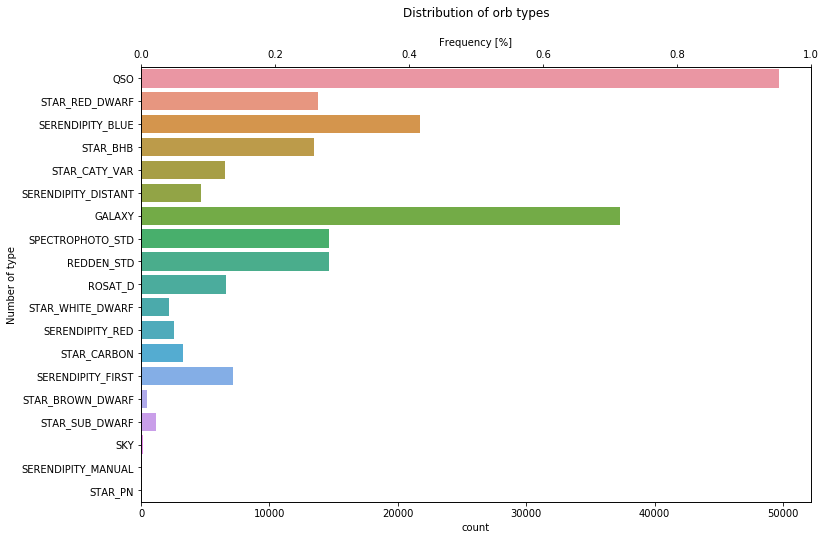

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="type", data=df)
plt.title('Distribution of orb types\n')
plt.ylabel('Number of type')

# Make twin axis
ax2=ax.twiny()

# Switch so count axis is on right, frequency on left
ax2.xaxis.tick_top()
ax.xaxis.tick_bottom()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Frequency [%]')


각 관측값의 빛의 종류에 따른 분포정도를 확인하기 위해 box plot 확인

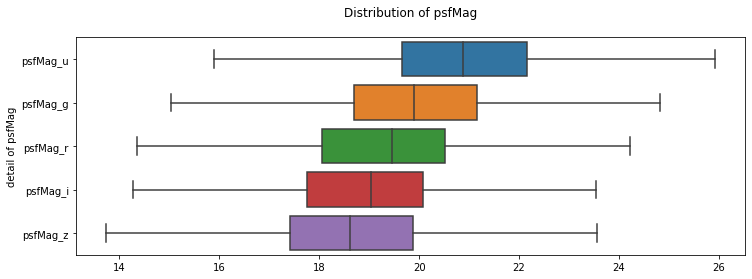

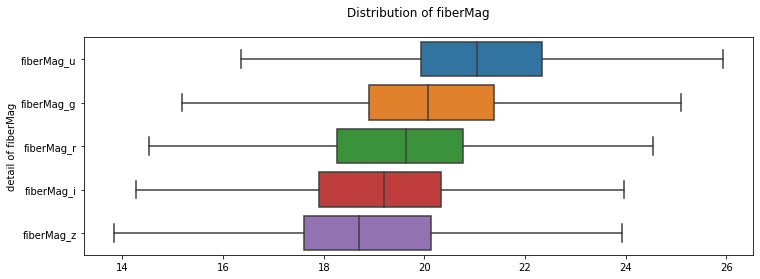

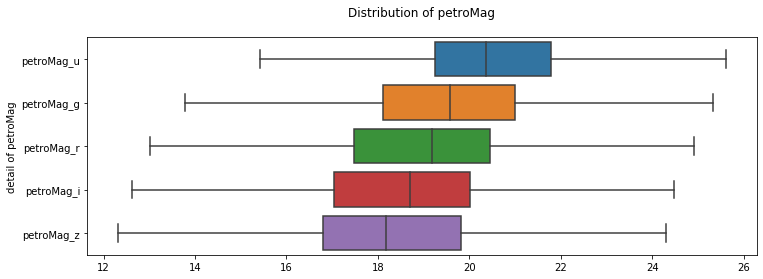

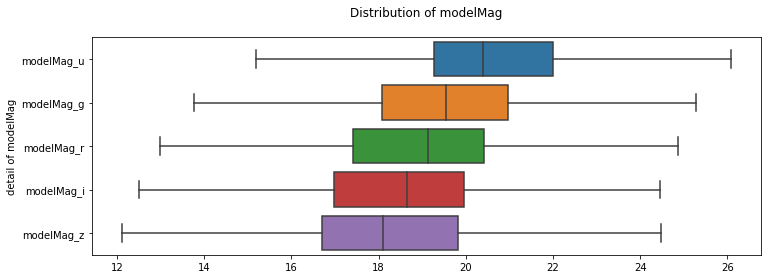

In [8]:

for fg in feature_group :
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = df[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)
    plt.ylabel('detail of %s'%fg)

특징들의 분포 모양 확인 

C:\Users\AHN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


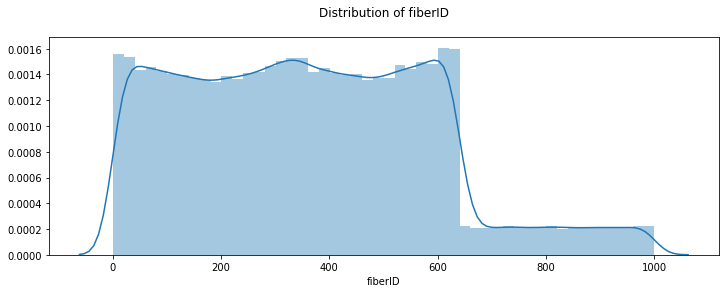

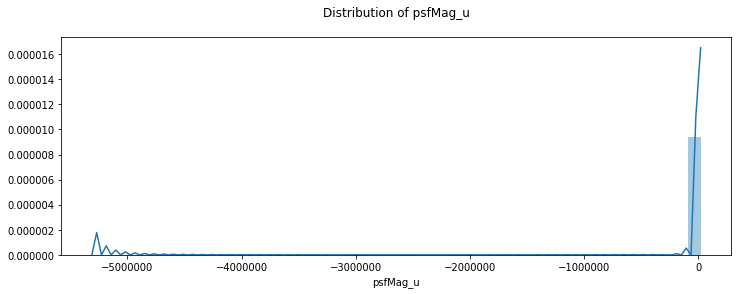

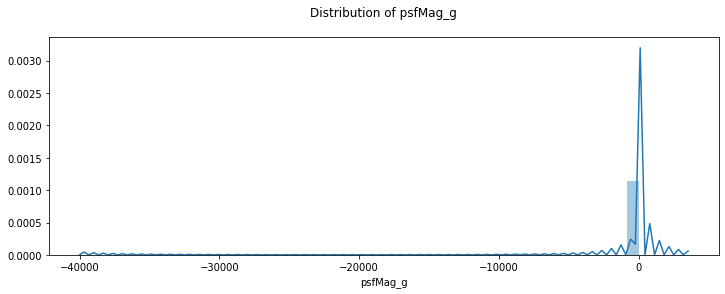

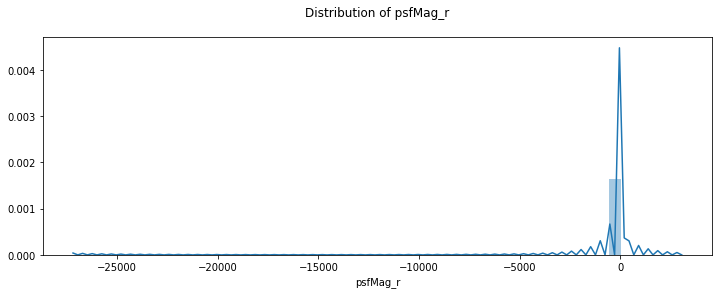

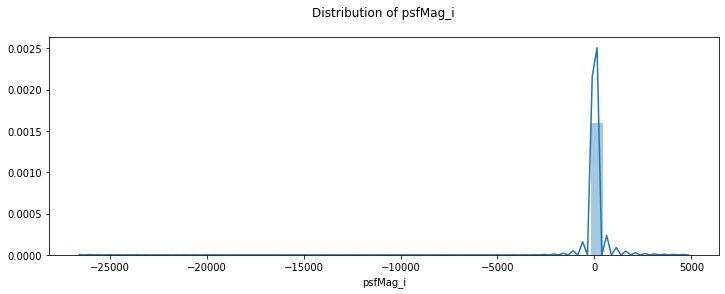

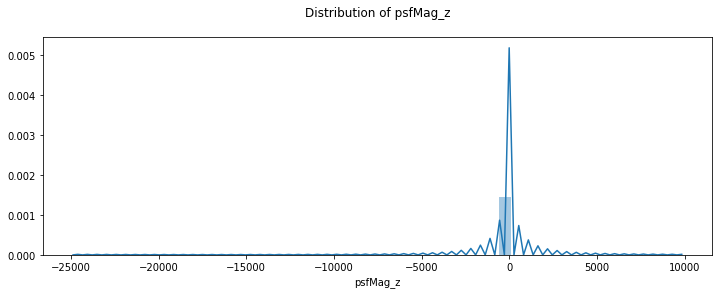

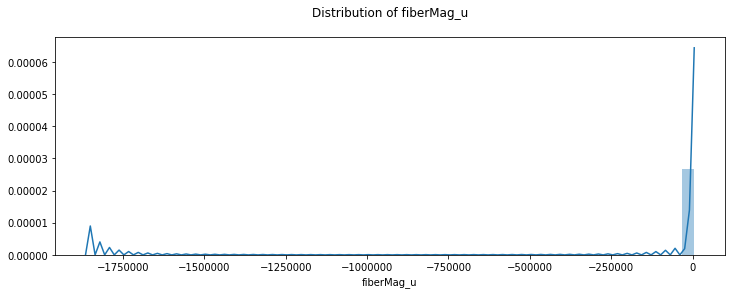

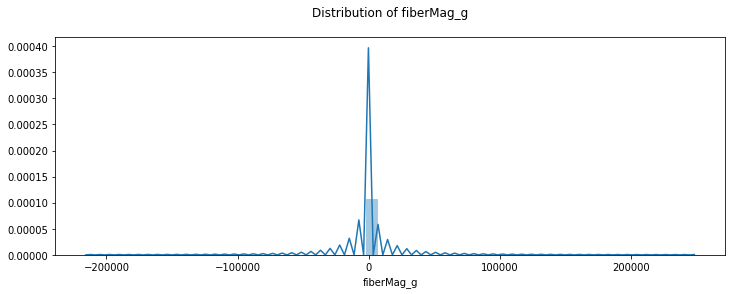

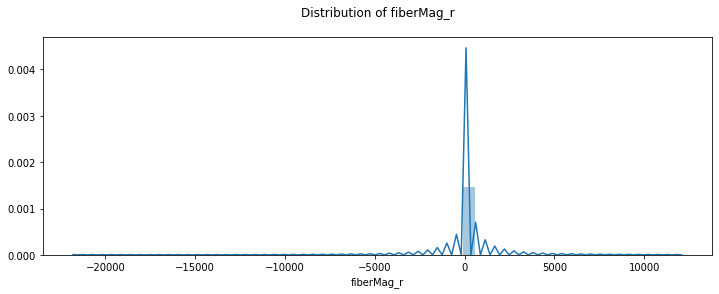

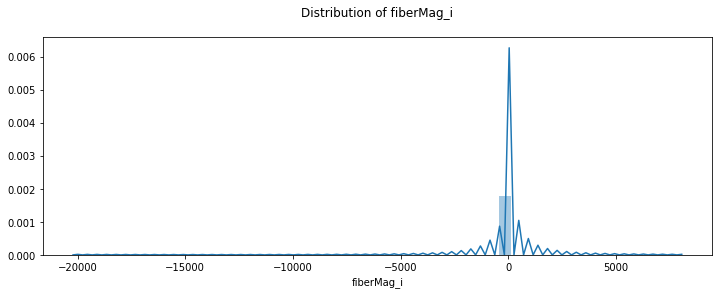

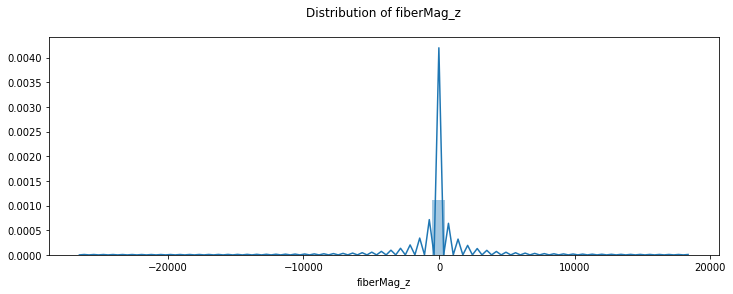

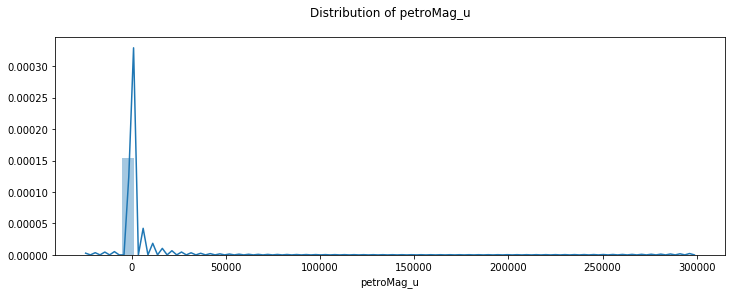

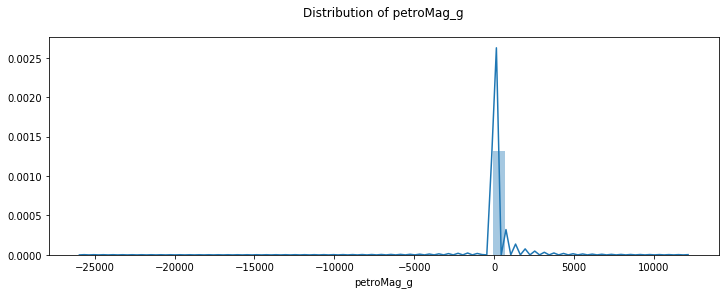

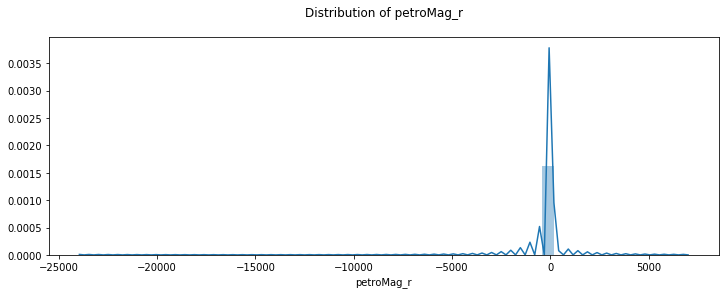

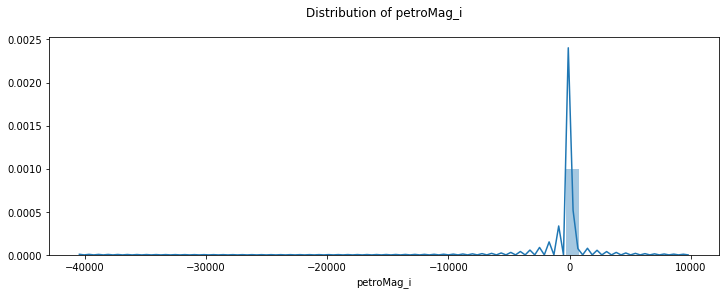

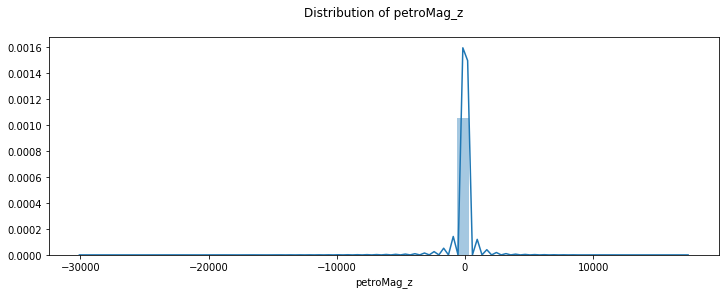

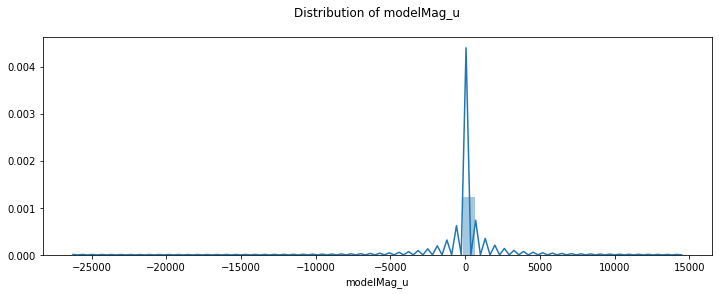

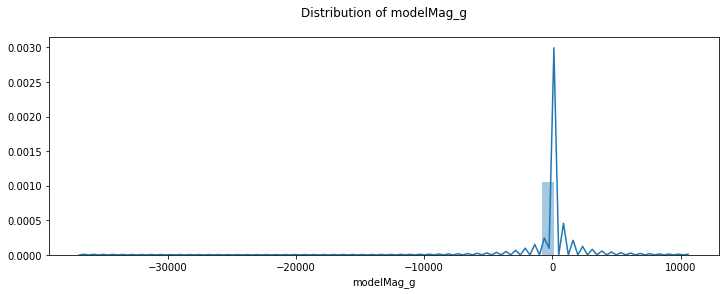

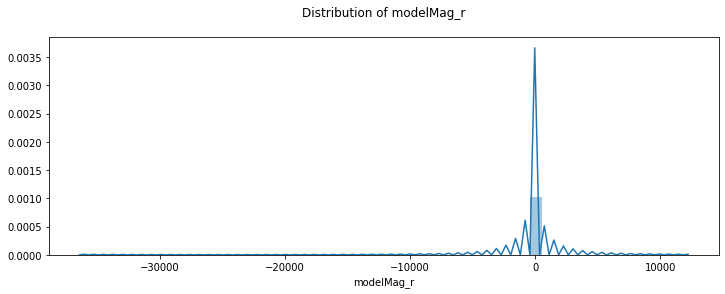

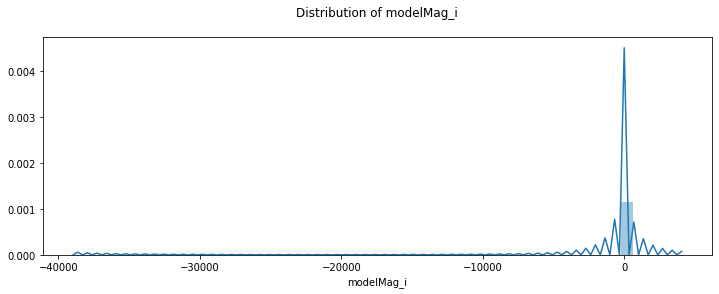

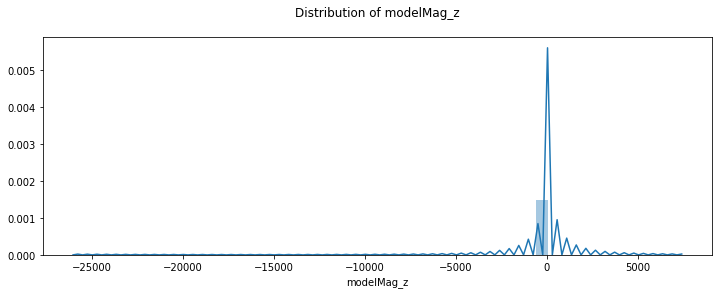

In [12]:
# for col in features :
#     plt.figure(figsize=(12,4))
#     sns.distplot(df[col])
#     plt.title('Distribution of %s\n'%col)

데이터의 outlier값을 가지고 있는 천체 타입에 대한 정보 확인 (진행중)

In [34]:
out_data = pd.DataFrame()
for col in features :
    Q1 = df[col].quantile(0.1)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    data = df[ (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][['type', col]]
    data = data.groupby(['type']).count()
    print(data)

Empty DataFrame
Columns: [fiberID]
Index: []
                     psfMag_u
type                         
GALAXY                     27
QSO                        20
REDDEN_STD                  2
ROSAT_D                    24
SERENDIPITY_BLUE            4
SERENDIPITY_DISTANT         1
SERENDIPITY_FIRST           1
SERENDIPITY_RED             2
STAR_BHB                    5
STAR_CARBON                 1
STAR_RED_DWARF              3
                     psfMag_g
type                         
GALAXY                     32
QSO                         5
REDDEN_STD                  2
ROSAT_D                    17
SERENDIPITY_BLUE            5
SERENDIPITY_DISTANT         1
SERENDIPITY_RED             1
STAR_BHB                    4
STAR_RED_DWARF              2
                     psfMag_r
type                         
GALAXY                     21
QSO                        11
REDDEN_STD                  2
ROSAT_D                    21
SERENDIPITY_BLUE            6
SERENDIPITY_DISTANT      

천체 타입에 따른 변수간의 상관관계

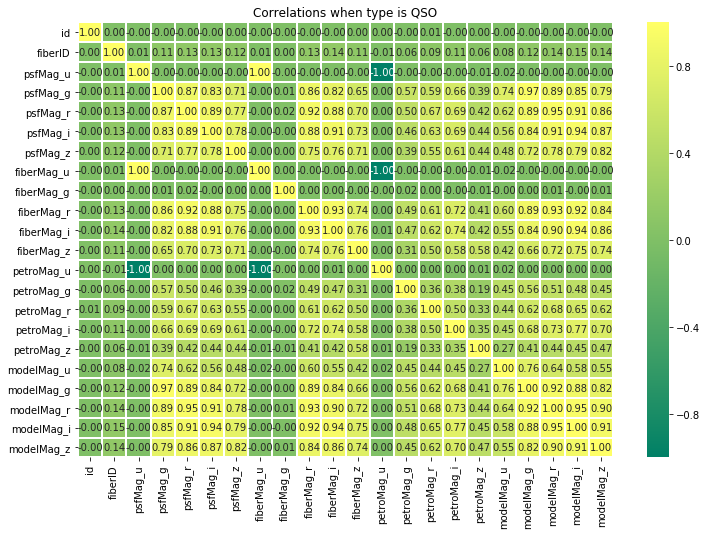

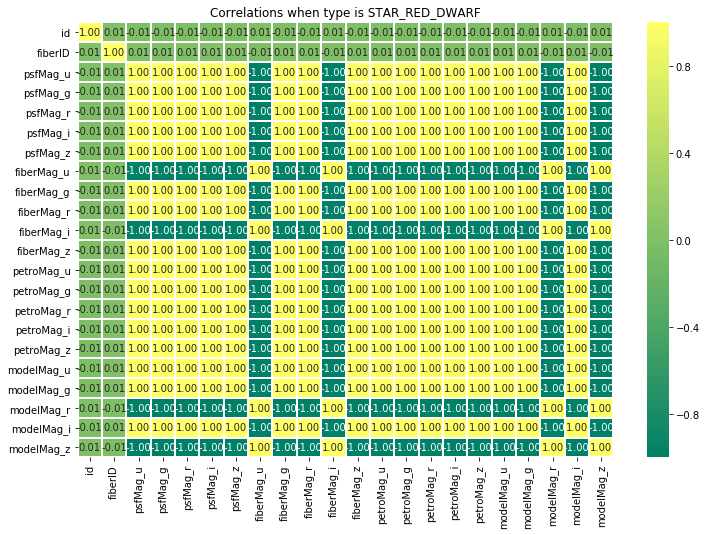

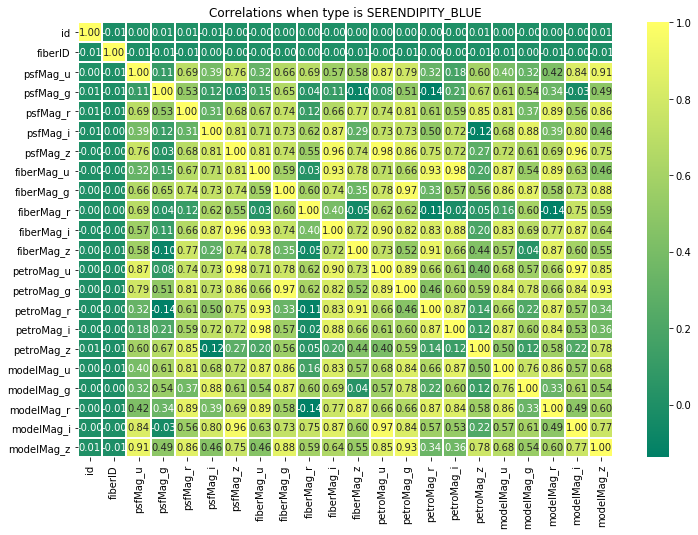

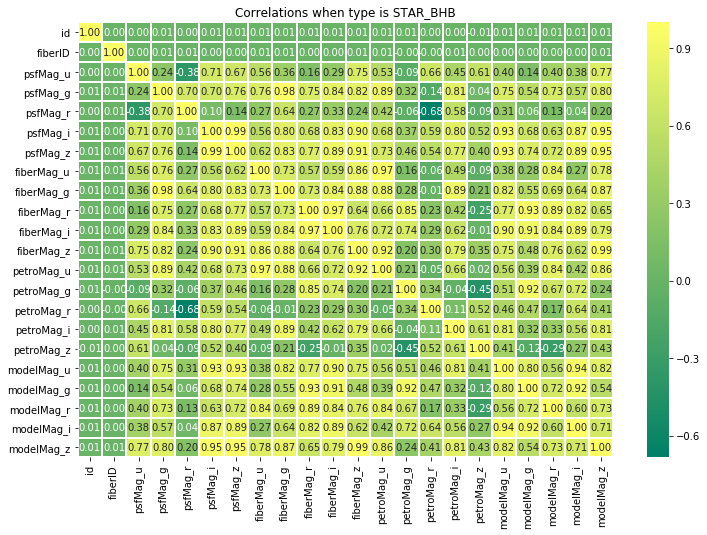

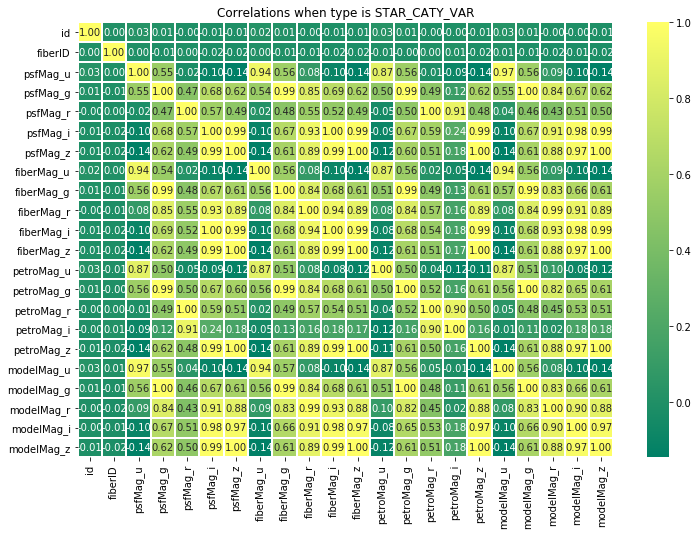

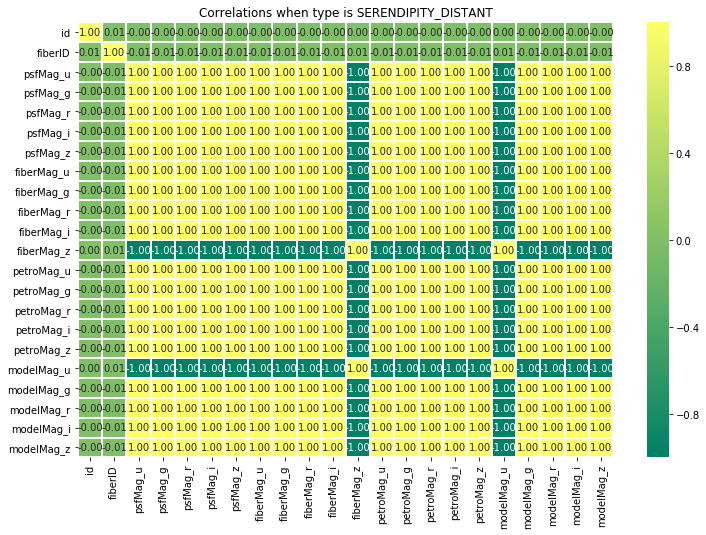

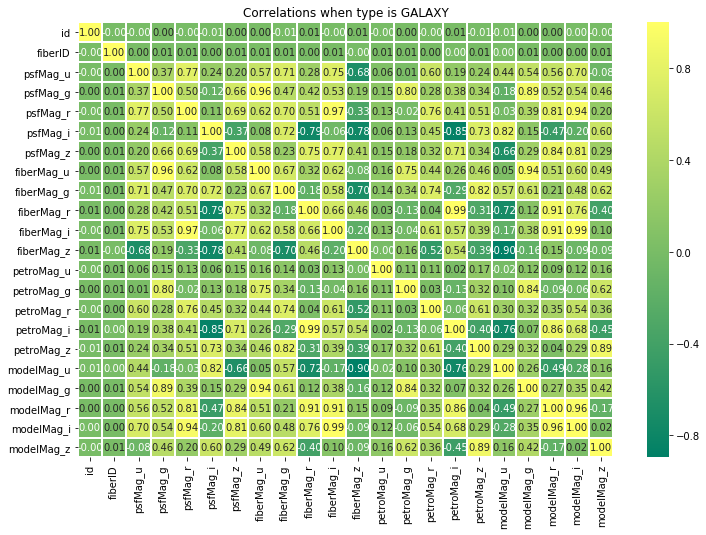

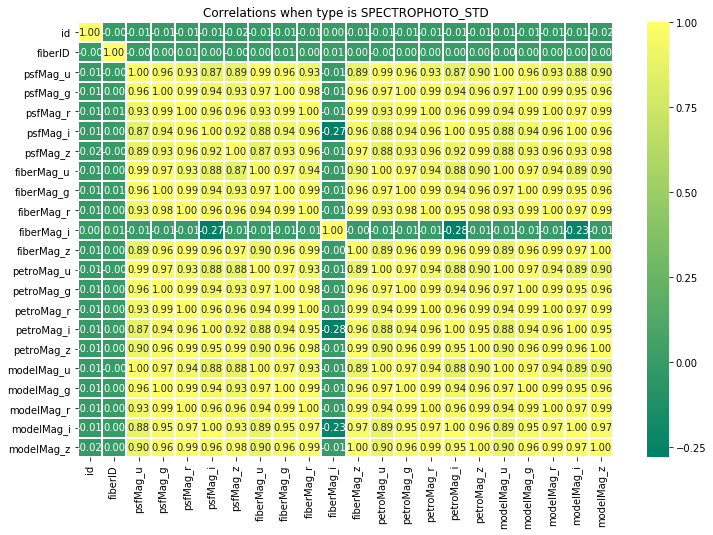

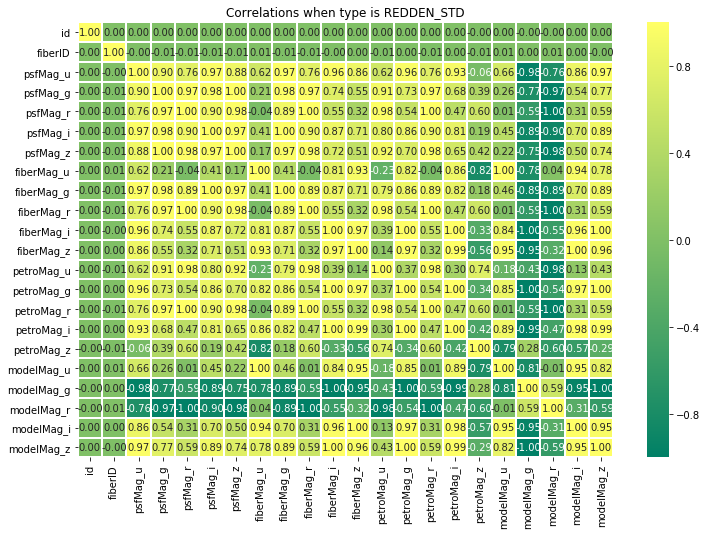

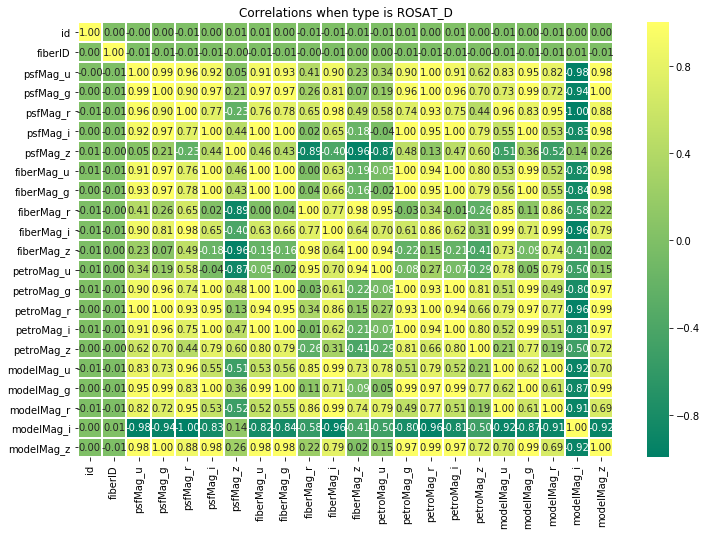

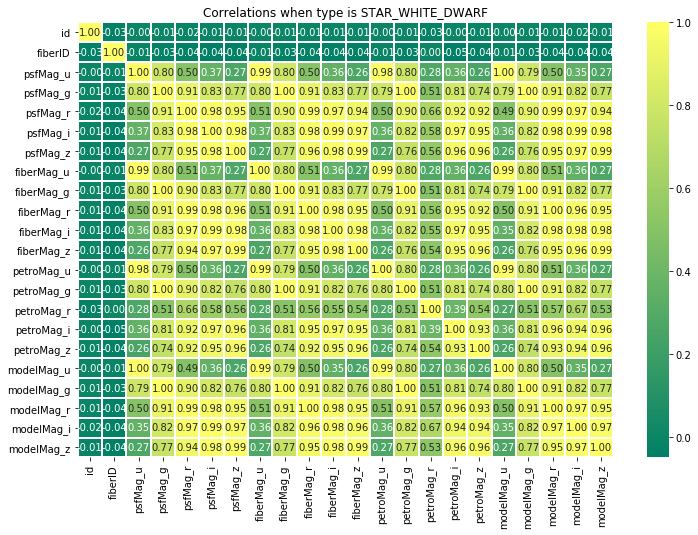

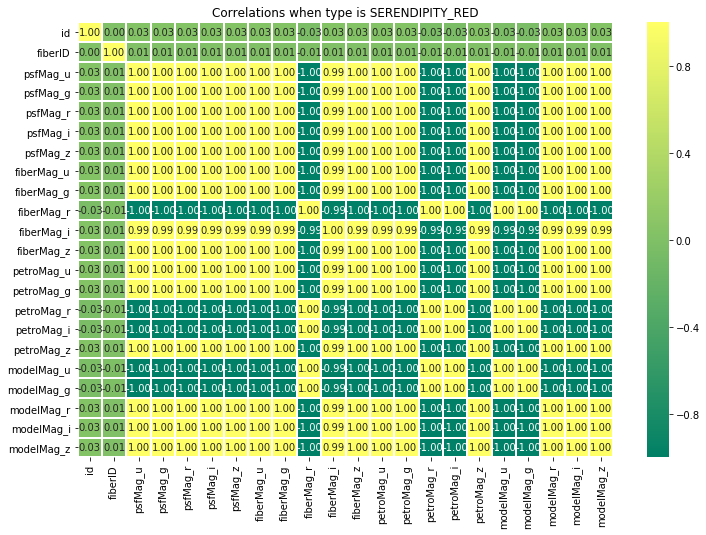

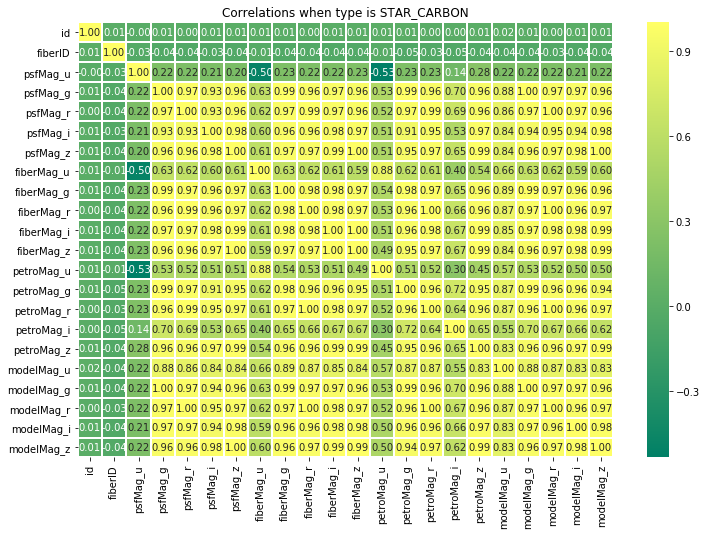

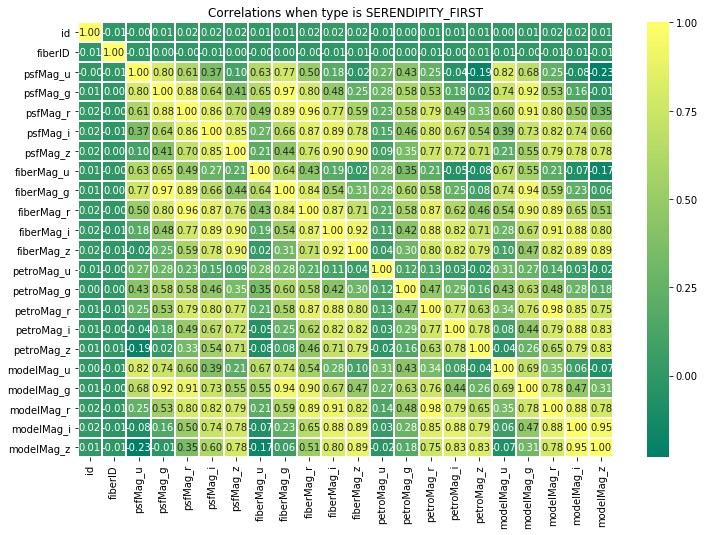

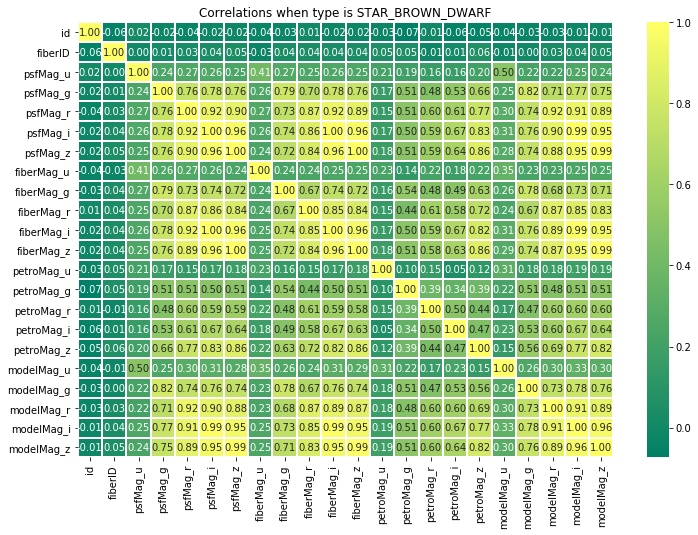

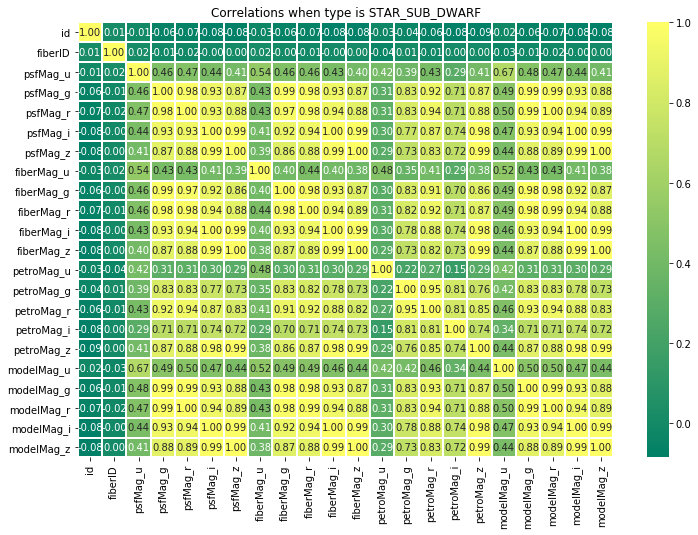

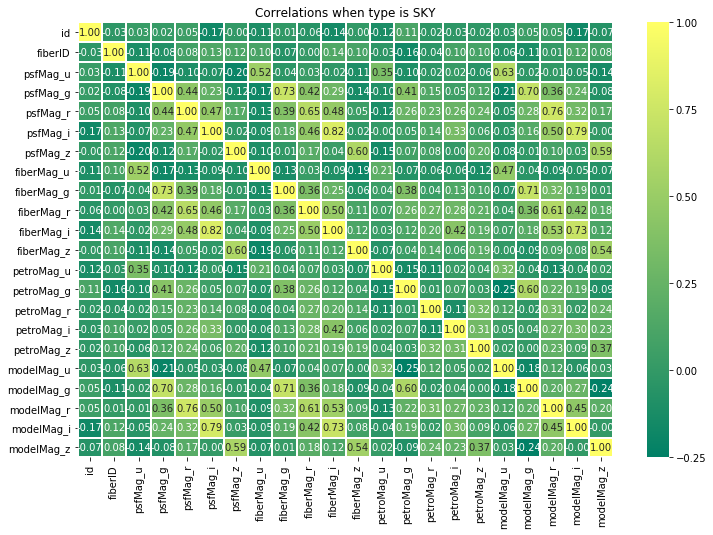

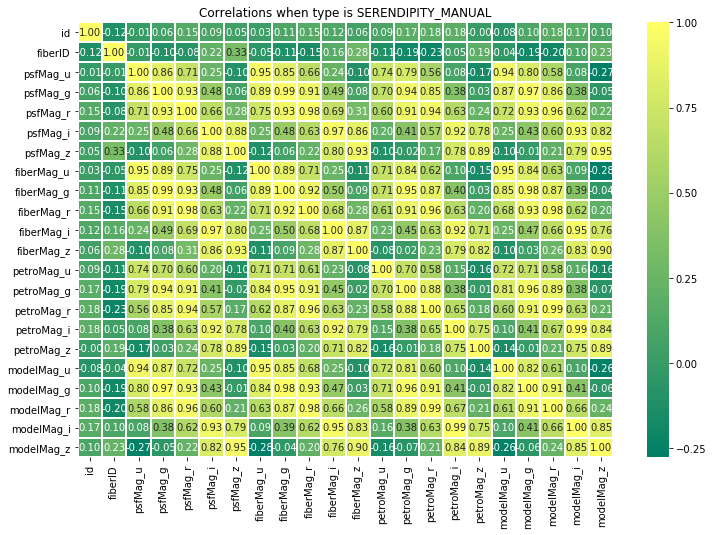

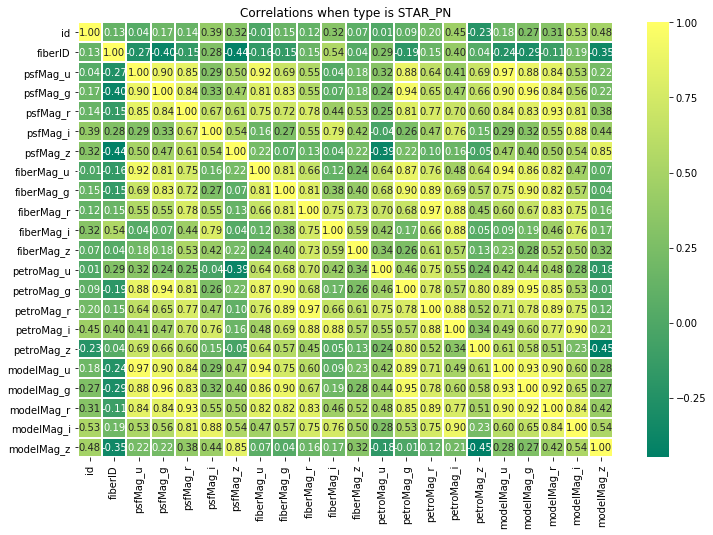

In [39]:
for x in types:    
    plt.figure(figsize=(12,8))
    ax =  sns.heatmap(df[df['type'] == x].corr(method='pearson'), annot = True,   
                fmt = '.2f',linewidths = 1, cmap="summer")
    buttom, top = ax.get_ylim()
    ax.set_ylim(buttom + 0.5, top - 0.5)
    plt.title("Correlations when type is %s"%x)